<a href="https://colab.research.google.com/github/pravali96/Artificial-Neural-Networks/blob/main/Churn_Modeling_using_Keras_and_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()
import io

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
pd.pandas.set_option('display.max_columns',None)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Exited'].value_counts() #imbalanced data

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df.isnull().sum() # No nulls

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exited Vs CreditScore

In [ ]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

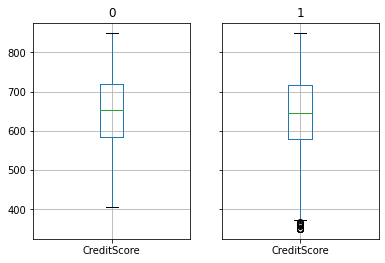

In [ ]:
df.groupby('Exited').boxplot(column='CreditScore')

### Exited Vs Balance

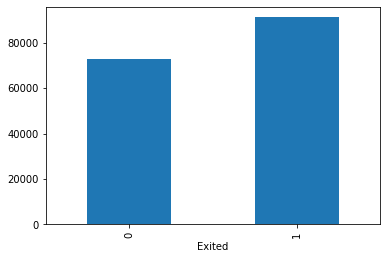

In [ ]:
df.groupby('Exited')['Balance'].mean().plot.bar()

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

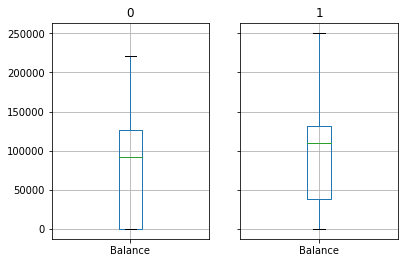

In [ ]:
df.groupby('Exited').boxplot(column='Balance')

### Exited Vs Age

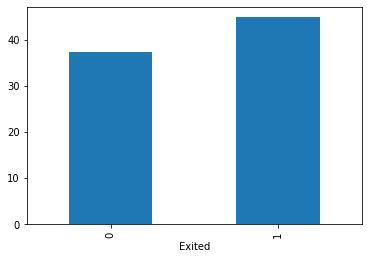

In [ ]:
df.groupby('Exited')['Age'].mean().plot.bar()

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

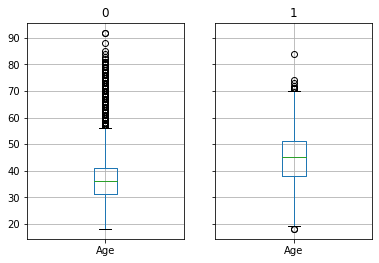

In [ ]:
df.groupby('Exited').boxplot(column='Age')

In [6]:
#Splitting Data
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [7]:
# Convert categorical variabless geography and gender to dummy variables
geography=pd.get_dummies(df['Geography'], drop_first=True)
gender=pd.get_dummies(df['Gender'], drop_first=True)

In [8]:
# Concat these 2 to df
X=pd.concat([X,geography, gender], axis=1)

In [9]:
X=X.drop(['Geography', 'Gender'], axis=1)

In [10]:
# Creating Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [11]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LeakyReLU, ELU, PReLU

In [13]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
#Using gridsearch to select the best hyper parameters
def create_model(layers, activation):
  model=Sequential()
  for i, nodes in enumerate(layers):
    if i ==0:
      model.add(Dense(units=nodes, activation=activation ,input_dim=X_train.shape[1]))
      #model.add(Activation(activation))
    else:
      model.add(Dense(nodes,activation=activation))
    model.add(Dense(units=1, activation='sigmoid')) #output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
model=KerasClassifier(build_fn=create_model,verbose=0)

In [47]:
model

In [48]:
# define params
layers=[[20],[40,20],[20,25,15]]
activations=['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid1=GridSearchCV(estimator=model,param_grid=param_grid)

In [49]:
grid_result=grid1.fit(X_train, y_train)

In [50]:
[grid_result.best_score_,grid_result.best_params_]

[0.8569999933242798,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [40, 20]}]

In [51]:
# pred_y = grid1.predict(X_test)
pred_y =grid1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [52]:
y_pred = (pred_y > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1505,   90],
       [ 196,  209]])

In [54]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.857